# Part 3: Linear Relationships

---

As before, let's clear our workspace. In Jupyter we do this be restarting our kernel to clear are variables. In your notebook, press the buttons `Restart Kernel` and `Clear All Outputs`.

In [1]:
# Set the working directory (adapt the path to your directory)
import os
os.chdir("C:/Users/wachb/OneDrive - UvA/CSSci/Stats/revision/Notebooks/notebooks") # put the data files in the same folder!

In [2]:
import pandas as pd
dat1 = pd.read_csv("communities.csv")

# Print column names:
print(dat1.columns)

Index(['state', 'county', 'community', 'communityname', 'fold', 'population',
       'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24',
       'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage',
       'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire',
       'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap',
       'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
       'PctUnemployed'],
      dtype='object')


Regression is aimed at determining the strength of the relationship, between one dependent variable (conventionally denoted by Y) and another changing variable (known as independent variables) or series or IVs

Here, we look at bivariate relations (which is essentially what a t-test does):

In [3]:
#lets just take three variables from this:
dat2 = dat1[["PctUnemployed", "PctNotHSGrad", "population"]]
dat2.head()

,PctUnemployed,PctNotHSGrad,population
0,0.27,0.18,0.19
1,0.27,0.24,0.00
2,0.36,0.43,0.00
3,0.33,0.25,0.04
4,0.12,0.30,0.01


We may choose to change the scale of the proportion to percentages for easier interpretation. As a consequence, the estimates can be interpreted as the change in y when x changes by 1 percentage point.

In [4]:
dat2['PctNotHSGrad'] = dat2['PctNotHSGrad'] *100
dat2['PctUnemployed'] = dat2['PctUnemployed'] *100
dat2.head()

C:\Users\wachb\AppData\Local\Temp\ipykernel_16452\3612351203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat2['PctNotHSGrad'] = dat2['PctNotHSGrad'] *100
C:\Users\wachb\AppData\Local\Temp\ipykernel_16452\3612351203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat2['PctUnemployed'] = dat2['PctUnemployed'] *100


,PctUnemployed,PctNotHSGrad,population
0,27.0,18.0,0.19
1,27.0,24.0,0.00
2,36.0,43.0,0.00
3,33.0,25.0,0.04
4,12.0,30.0,0.01


Does lower education relate to higher unemployment? Let's test this.

$H_0:$ lower education & higher unemployment are unrelated.

$H_a:$ They are related.

Here we assume a linear relationship between the variables. Essentially, it is like drawing a straight line through the data in such a way that each point is at a minimum distance away from that line...

We can plot these results and the line. On the x-axis we put the IV and on the y-axis we put the DV:

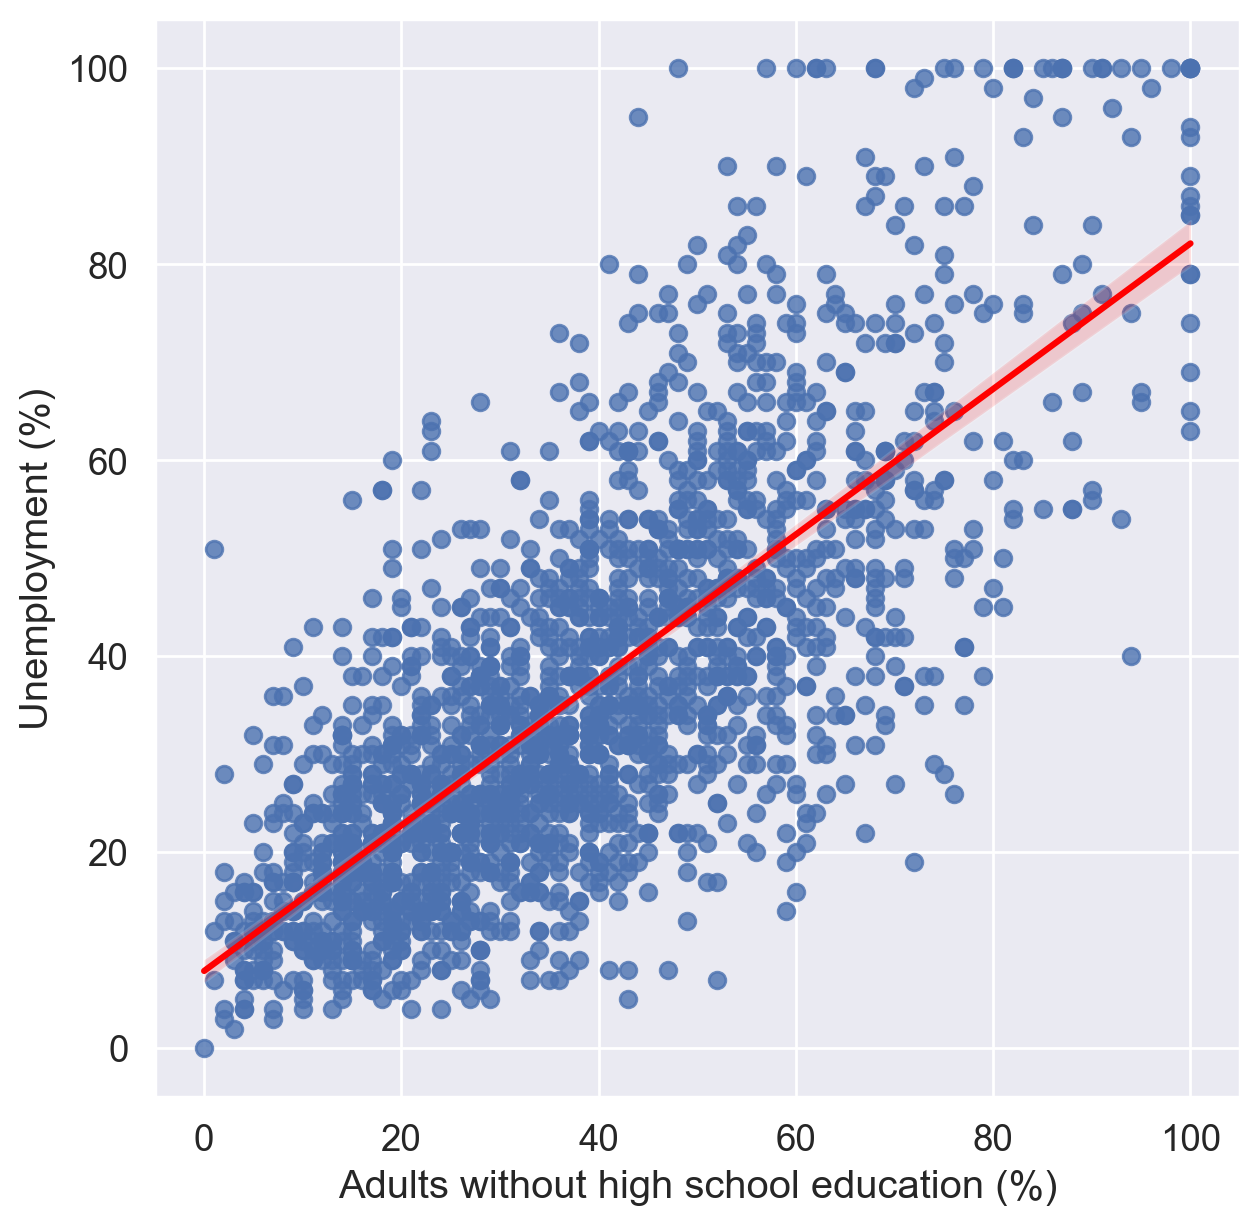

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x="PctNotHSGrad", y="PctUnemployed", data=dat2, line_kws={"color": "red"})
plt.xlabel('Adults without high school education (%)')
plt.ylabel('Unemployment (%)')
plt.show()

What can we conclude from this? Interpret this by first calculating a correlation coeffcient.

In [1]:
# Your answer:


#### Heatmap: What if we are interested in multiple correlation coeffcients? 
For example among your attitudinal scales. 

In [7]:
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
import numpy as np
sns.set(color_codes=True, font_scale=1.2)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [8]:
!pip install heatmapz

In [9]:
# Import the two methods from heatmap library
from heatmap import heatmap, corrplot

In [10]:
# print the variables so as to not make mistakes in subsetting
print(dat1.columns.tolist())

['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed']


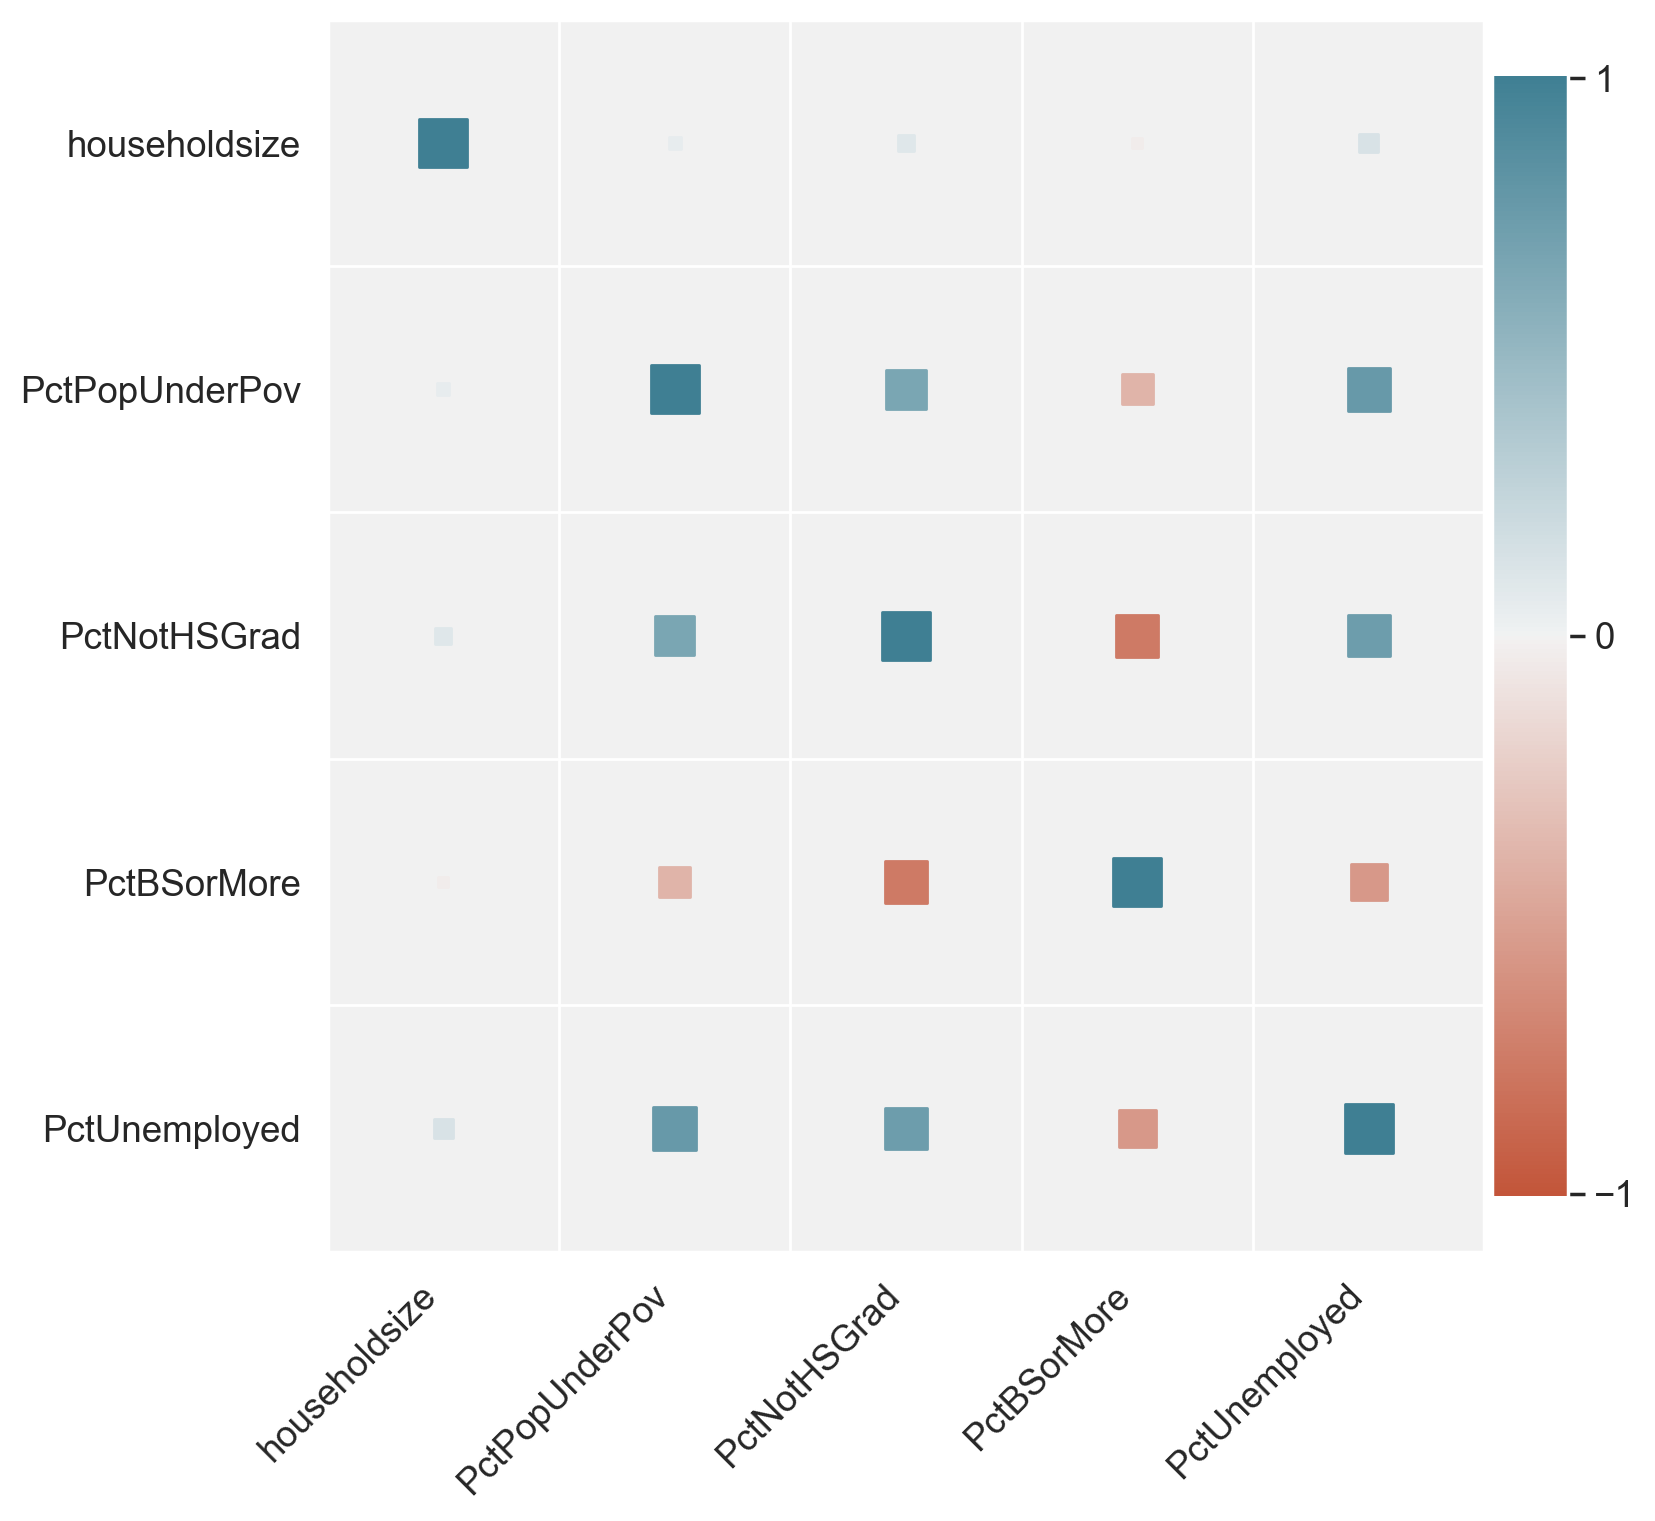

In [11]:
#Depicting a heatmap
columns_to_select = ['householdsize', 'PctPopUnderPov', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed']
corr_matrix = dat1[columns_to_select].corr()
plt.figure(figsize=(8, 8))
corrplot(corr_matrix, size_scale=300)

How do you interpret this?